 # Librerias

In [ ]:
# 1. Librerias

#### CODIGO


! pip install pennylane
! pip install qutip
#! pip install pennylane-sf --upgrade
#! pip install PennyLane-Lightning

import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
from qutip import Bloch
import qutip

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

from qutip import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 20.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


# Funciones

In [ ]:
"""# 2. Funciones propias"""

def fidelity(state0, state1):
  F  = qml.math.fidelity(state0, state1)
  return F

# Make a dataset of points inside and outside of a circle
def circle(samples, center=[0.0, 0.0], radius=np.sqrt(2 / np.pi)):
    """
    Generates a dataset of points with 1/0 labels inside a given radius.

    Args:
        samples (int): number of samples to generate
        center (tuple): center of the circle
        radius (float: radius of the circle

    Returns:
        Xvals (array[tuple]): coordinates of points
        yvals (array[int]): classification labels
    """
    Xvals, yvals = [], []

    for i in range(samples):
        x = 2 * (np.random.rand(2)) - 1
        y = 0
        if np.linalg.norm(x - center) < radius:
            y = 1
        Xvals.append(x)
        yvals.append(y)
    return np.array(Xvals, requires_grad=False), np.array(yvals, requires_grad=False)

# Commented out IPython magic to ensure Python compatibility.
def make_IRIS(n_comp):
  # Cargar el conjunto de datos Iris
  iris = load_iris()
  # Acceder a las características y las etiquetas
  X = iris.data  # Características
  # Crear una instancia de PCA y especificar el número de componentes deseados (2 en este caso)
  pca = PCA(n_components=n_comp, random_state=None)
  # Aplicar PCA a las características
  X_pca = pca.fit(X).transform(X)
  y = iris.target  # Etiquetas
  # Percentage of variance explained for each components
  print(
      "explained variance ratio (first two components): %s"
#       % str(pca.explained_variance_ratio_)
  )
  return X_pca, y

def circle_v2(samples, centers=[[0.0, 0.0], [0.0, 0.0]], radii=[np.sqrt(0.8),np.sqrt(0.8 - 2/np.pi)]):
    """
    Generates a dataset of points with three class labels based on two radii.

    Args:
        samples (int): number of samples to generate
        centers (list of tuples): centers of the circles
        radii (list of floats): radii of the circles

    Returns:
        Xvals (array[tuple]): coordinates of points
        yvals (array[int]): classification labels
    """
    Xvals, yvals = [], []

    for i in range(samples):
        x = 2 * (np.random.rand(2)) - 1
        y = 0

        for j, center in enumerate(centers):
            if np.linalg.norm(x - center) < radii[j]:
                y = j + 1

        Xvals.append(x)
        yvals.append(y)

    return np.array(Xvals, requires_grad=False), np.array(yvals, requires_grad=False)

def make_IRIS_v2(n_comp, n_classes):
    # Cargar el conjunto de datos Iris
    iris = load_iris()
    # Acceder a las características y las etiquetas
    X = iris.data  # Características
    # Crear una instancia de PCA y especificar el número de componentes deseados
    pca = PCA(n_components=n_comp, random_state=None)
    # Aplicar PCA a las características
    X_pca = pca.fit_transform(X)
    y = iris.target  # Etiquetas
    if n_classes == 1:
        # Filtrar muestras y etiquetas de una clase específica
        class_index = 0  # Índice de la clase deseada
        mask = (y == class_index)
        X_pca = X_pca[mask]
        y = y[mask]
        return X_pca, y
    elif n_classes == 2:
        # Filtrar muestras y etiquetas de dos clases específicas
        class_indices = [0, 1]  # Índices de las clases deseadas
        mask = np.isin(y, class_indices)
        X_pca = X_pca[mask]
        y = y[mask]
        return X_pca, y
    else:
      return X_pca,y

def representatives(classes, qubits_lab):
    """
    This function creates the label states for the classification task
    INPUT:
        -classes: number of classes of our problem
        -qubits_lab: how many qubits will store the labels
    OUTPUT:
        -reprs: the label states
    """
    reprs = np.zeros((classes, 2**qubits_lab), dtype = 'complex', requires_grad=False)
    if qubits_lab == 1:
        if classes == 0:
            raise ValueError('Nonsense classifier')
        if classes == 1:
            raise ValueError('Nonsense classifier')
        if classes == 2:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([0, 1])
        if classes == 3:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([1 / 2, np.sqrt(3) / 2])
            reprs[2] = np.array([1 / 2, -np.sqrt(3) / 2])
        if classes == 4:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([1 / np.sqrt(3), np.sqrt(2 / 3)])
            reprs[2] = np.array([1 / np.sqrt(3), np.exp(1j * 2 * np.pi / 3) * np.sqrt(2 / 3)])
            reprs[3] = np.array([1 / np.sqrt(3), np.exp(-1j * 2 * np.pi / 3) * np.sqrt(2 / 3)])
        if classes == 6:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([0, 1])
            reprs[2] = 1 / np.sqrt(2) * np.array([1, 1])
            reprs[3] = 1 / np.sqrt(2) * np.array([1, -1])
            reprs[4] = 1 / np.sqrt(2) * np.array([1, 1j])
            reprs[5] = 1 / np.sqrt(2) * np.array([1, -1j])

    if qubits_lab == 2:
        if classes == 0:
            raise ValueError('Nonsense classifier')
        if classes == 1:
            raise ValueError('Nonsense classifier')
        if classes == 2:
            reprs[0] = np.array([1, 0, 0, 0])
            reprs[1] = np.array([0, 0, 0, 1])
        if classes == 3:
            reprs[0] = np.array([1, 0, 0, 0])
            reprs[1] = np.array([0, 1, 0, 0])
            reprs[2] = np.array([0, 0, 1, 0])
        if classes == 4:
            reprs[0] = np.array([1, 0, 0, 0])
            reprs[1] = np.array([0, 1, 0, 0])
            reprs[2] = np.array([0, 0, 1, 0])
            reprs[3] = np.array([0, 0, 0, 1])

    return reprs

def representatives_to_entropy(classes, qubits_lab):
    """
    This function creates the label states for the classification task
    INPUT:
        -classes: number of classes of our problem
        -qubits_lab: how many qubits will store the labels
    OUTPUT:
        -reprs: the label states
    """
    reprs = np.zeros((classes, 2**qubits_lab), dtype = 'complex', requires_grad=False)
    if qubits_lab == 1:
        if classes == 0:
            raise ValueError('Nonsense classifier')
        if classes == 1:
            raise ValueError('Nonsense classifier')
        if classes == 2:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([0, 1])
        if classes == 3:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([1 / 2, np.sqrt(3) / 2])
            reprs[2] = np.array([1 / 2, -np.sqrt(3) / 2])
        if classes == 4:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([1 / np.sqrt(3), np.sqrt(2 / 3)])
            reprs[2] = np.array([1 / np.sqrt(3), np.exp(1j * 2 * np.pi / 3) * np.sqrt(2 / 3)])
            reprs[3] = np.array([1 / np.sqrt(3), np.exp(-1j * 2 * np.pi / 3) * np.sqrt(2 / 3)])
        if classes == 6:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([0, 1])
            reprs[2] = 1 / np.sqrt(2) * np.array([1, 1])
            reprs[3] = 1 / np.sqrt(2) * np.array([1, -1])
            reprs[4] = 1 / np.sqrt(2) * np.array([1, 1j])
            reprs[5] = 1 / np.sqrt(2) * np.array([1, -1j])

    if qubits_lab == 2:
        if classes == 0:
            raise ValueError('Nonsense classifier')
        if classes == 1:
            raise ValueError('Nonsense classifier')
        if classes == 2:
            reprs[0] = np.array([1, 0, 0, 0])
            reprs[1] = np.array([0, 0, 0, 1])
        if classes == 3:
            reprs[0] = np.array([1, 0, 0, 0])
            reprs[1] = np.array([0, 1, 0, 0])
            reprs[2] = np.array([0, 0, 1, 0])
        if classes == 4:
            reprs[0] = np.array([1, 0, 0, 0])
            reprs[1] = np.array([0, 1, 0, 0])
            reprs[2] = np.array([0, 0, 1, 0])
            reprs[3] = np.array([0, 0, 0, 1])

    return reprs

def to_spherical(state):
    r0 = np.abs(state[0])
    ϕ0 = np.angle(state[0])
    r1 = np.abs(state[1])
    ϕ1 = np.angle(state[1])
    r = np.sqrt(r0 ** 2 + r1 ** 2)
    θ = 2 * np.arccos(r0 / r)
    ϕ = ϕ1 - ϕ0
    return [r, θ, ϕ]

def to_cartesian(polar):
    r = polar[0]
    θ = polar[1]
    ϕ = polar[2]
    x = r * np.sin(θ) * np.cos(ϕ)
    y = r * np.sin(θ) * np.sin(ϕ)
    z = r * np.cos(θ)
    return [x, y, z]

def visualization_1_qubit(f_q_circuit, X, Y, params, ax, angles=[-90,180], sz=1, bias=None, entanglement=False):
  nf, nc = X.shape
  clases = list(set(Y))
  if nc == 1:
    X = np.hstack((X, np.zeros((nf, 2), requires_grad=False)))
  elif nc == 2:
    X = np.hstack((X, np.zeros((nf, 1), requires_grad=False)))
  dict_coord = {}
  # Agregar datos al diccionario
  def agregar_dato(key, dato):
      dict_coord.setdefault(key, []).append(dato)
  for i in range(len(X)):
    state = f_q_circuit(params, X[i], bias, entanglement)
    alpha, beta = state
    my_state = [complex(alpha), complex(beta)]
    polar = to_spherical(my_state)
    x, y, z = to_cartesian(polar)
    agregar_dato(f'cl_{int(Y[i])}_x', x)
    agregar_dato(f'cl_{int(Y[i])}_y', y)
    agregar_dato(f'cl_{int(Y[i])}_z', z)
  bloch_sphere = Bloch(view=(angles))
  bloch_sphere.axes = ax
  bloch_sphere.point_size = sz
  color_to_cycle = ["#FF0000", "#0000FF", "#006400"]
  my_colors = [ color_to_cycle[cl] for cl in clases ]
  bloch_sphere.point_color = my_colors
  for cl in clases:
    X_key = f'cl_{cl}_x'
    Y_key = f'cl_{cl}_y'
    Z_key = f'cl_{cl}_z'
    pnts = [dict_coord[X_key], dict_coord[Y_key], dict_coord[Z_key]]
    bloch_sphere.add_points(pnts)
    bloch_sphere.render()
  bloch_sphere.show()

# Visualizacion Train, test, true
def plot_data(x, y, fig=None, ax=None):
    """
    Plot data with red/blue values for a binary classification.

    Args:
        x (array[tuple]): array of data points as tuples
        y (array[int]): array of data points as tuples
    """
    if fig == None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    reds = y == 0
    blues = y == 1
    ax.scatter(x[reds, 0], x[reds, 1], c="red", s=20, edgecolor="k")
    ax.scatter(x[blues, 0], x[blues, 1], c="blue", s=20, edgecolor="k")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")

# Visualizacion Train, test, true
def plot_data_v2(x, y, fig=None, ax=None):
    """
    Plot data with red/blue values for a binary classification.

    Args:
        x (array[tuple]): array of data points as tuples
        y (array[int]): array of data points as tuples
    """
    if fig == None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    reds = y == 0
    blues = y == 1
    green = y == 2
    ax.scatter(x[reds, 0], x[reds, 1], c="red", s=20, edgecolor="k")
    ax.scatter(x[blues, 0], x[blues, 1], c="blue", s=20, edgecolor="k")
    ax.scatter(x[green, 0], x[green, 1], c="green", s=20, edgecolor="k")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")

def accuracy_score(y_true, y_pred):
    """Accuracy score.

    Args:
        y_true (array[float]): 1-d array of targets
        y_predicted (array[float]): 1-d array of predictions
        state_labels (array[float]): 1-d array of state representations for labels

    Returns:
        score (float): the fraction of correctly classified samples
    """
    score = y_true == y_pred
    return score.sum() / len(y_true)

def iterate_minibatches(inputs, targets, batch_size):
    """
    A generator for batches of the input data
    Args:
        inputs (array[float]): input data
        targets (array[float]): targets
    Returns:
        inputs (array[float]): one batch of input data of length `batch_size`
        targets (array[float]): one batch of targets of length `batch_size`
    """
    for start_idx in range(0, inputs.shape[0] - batch_size + 1, batch_size):
        idxs = slice(start_idx, start_idx + batch_size)
        yield inputs[idxs], targets[idxs]

def test(model, params, x, y, state_labels=None, bias=None, entanglement = False):
  """
  Tests on a given set of data. This function predicts in function of max fidelity.
  Args:
      params (array[float]): array of parameters
      x (array[float]): 2-d array of input vectors
      y (array[float]): 1-d array of targets
      state_labels (array[float]): 1-d array of state representations for labels
  Returns:
      predicted (array([int]): predicted labels for test data
      output_states (array[float]): output quantum states from the circuit
  """
  fidelity_values = []
  dm_labels = [s for s in state_labels]
  #print(f'len labels = {len(dm_labels)}')
  predicted = []
  for i in range(len(x)):
    #fidel_function = lambda y: qcircuit(params, x[i], y)
    fidelities = []
    for dm in dm_labels:
      state_output = model(params, x[i], bias=bias, entanglement = entanglement)
      # fidelity_cost(model, params, x, y, state_labels=None)
      f = fidelity(qml.math.dm_from_state_vector(state_output), qml.math.dm_from_state_vector(dm))
      fidelities.append(f)
    best_fidel = np.argmax(fidelities)
    #print(fidelities, best_fidel, y[i])
    predicted.append(best_fidel)
    fidelity_values.append(fidelities)
  return np.array(predicted), np.array(fidelity_values)

# Pulsos para 1 qubit

# Funciones para generar pulsos

In [ ]:
# Pulso cosenoidal

def pulse_x_cos(t, args):
    t_init = args["t_init"]
    t_final = args["t_final"]
    w = args["w"]
    pulse = np.heaviside((t-t_init), 0.0) * np.heaviside(-(t - t_final), 0.0)
    return np.cos(w*t)*pulse

# Pulsos para la clase

def pulse_x(t, args):
  t_init = args["t_init"]
  t_final = args["t_final"]
  y = np.heaviside((t-t_init), 0.0) * np.heaviside(-(t - t_final), 0.0)
  return y

def pulse_z(t, args):
  t_init = args["t_init"]
  t_final = args["t_final"]
  y = np.heaviside((t-t_init), 0.0) * np.heaviside(-(t - t_final), 0.0)
  return y

def pulse_x_with_noise(t, args):
  t_init = args["t_init"]
  t_final = args["t_final"]
  std_noise = args["std_noise"]
  noise = np.random.normal(loc=0, scale=std_noise, size = len(t))
  y = np.heaviside((t-t_init), 0.0) * np.heaviside(-(t - t_final), 0.0) + noise
  return y

def pulse_z_with_noise(t, args):
  t_init = args["t_init"]
  t_final = args["t_final"]
  std_noise = args["std_noise"]
  noise = np.random.normal(loc=0, scale=std_noise, size = len(t))
  y = np.heaviside((t-t_init), 0.0) * np.heaviside(-(t - t_final), 0.0) + noise
  return y

Frecuencia = 2.0 [Hz]


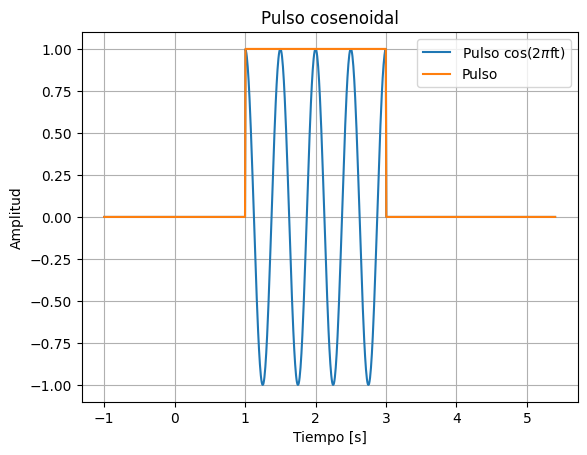

In [ ]:
# Pulso cosenoidal B1:

ti = 1
tf = 3
delt_t = tf - ti
ω_x = (2*np.pi*4)/delt_t
print(f"Frecuencia = {ω_x /(2*np.pi)} [Hz]")
# Ejemplo de uso
tiempo = np.linspace(-1, tf*1.80, 1000)
args_ejemplo = {"t_init": ti, "t_final": tf, "w": ω_x}

pulso_cos = pulse_x_cos(tiempo, args_ejemplo)
pulso_square = pulse_x(tiempo, args_ejemplo)

# Visualización del pulso
plt.plot(tiempo, pulso_cos, label=f'Pulso cos(2$\pi$ft)')
plt.plot(tiempo, pulso_square , label=f'Pulso')
plt.title('Pulso cosenoidal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

# $R_x(\alpha = \Omega_x t)$

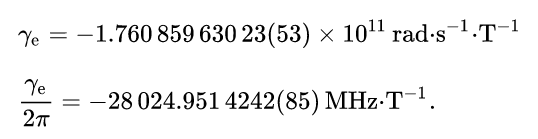

Sí $\Omega_x t = \alpha$ , entonces para encontrar $B1$:

$$γ \frac{B_1}{2}t = \alpha$$
$$ \rightarrow B_1 = \frac{2 \alpha}{γ t}$$

In [ ]:
# Parametros para fijar frecuencia de larmor
h = 1
# factor giromagnetico:
gir = 1.760e11
# angulo deseado:
alpha = np.pi/2
# Campo homogeneo:
B0 = 10e-3
print(f"B0 = {B0} [T]")
# Para girar univamente en el eje x se necesita hacer que
# wz = wx:
ω_z = gir*B0
ω_x = gir*B0
print(f"ω_x = {ω_x} [rad/s]")
print(f"f_x = {ω_x/(2*np.pi)} [hz]")
# Delta de tiempo para que se mueva el espin a un ciclo:
delt_t = (2*np.pi*1)/ω_x
print(f"tiempo = {delt_t} [s]")
# Calculo de B1:
B1 = (alpha*2)/(gir*delt_t)
print(f"B1 = {B1} [T]")
# Omega x:
O_x = gir*(B1/2)

B0 = 0.01 [T]
ω_x = 1760000000.0 [rad/s]
f_x = 280112699.8417358 [hz]
tiempo = 3.5699916518065832e-09 [s]
B1 = 0.005 [T]


In [ ]:
# Simulacion en RWA:
up = basis(2,0)
H0 = (h/2)*(ω_z-ω_x)*sigmaz()
H1 = (h/2)*O_x*sigmax()
H = [H0,[H1, pulse_x]]
args = {"t_init": 0, "t_final": delt_t}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 10000)
output_rwa = mesolve(H, up, tlist, c_ops, e_ops, args)

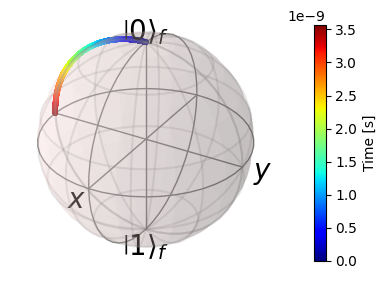

In [ ]:
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
b=Bloch()
b.axes = ax1
b.fig = fig
## normalize colors to times in tlist ##
nrm = mpl.colors.Normalize(0,delt_t)
colors = cm.jet(nrm(tlist))
## add data points from expectation values ##
b.add_points([output_rwa.expect[0],output_rwa.expect[1],output_rwa.expect[2]],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[8]
b.view=[-9,11]
b.zlpos=[1.1,-1.2]
b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
## plot sphere ##
## Add color bar ##
sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
sm.set_array([])  # You need to set a dummy array for the right scaling
cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
cbar.set_label('Time [s]')
b.render()
plt.show()

In [ ]:
output_rwa.expect[0][-1]

0.0

In [ ]:
output_rwa.expect[1][-1]

-0.9999999999999615

In [ ]:
output_rwa.expect[2][-1]

2.771072848406497e-07

In [ ]:
# Simulacion sin RWA:
up = basis(2,0)
H0 = (h/2)*(ω_z)*sigmaz()
H1 = (h)*O_x*sigmax()
H = [H0,[H1, pulse_x_cos]]
args = {"t_init": 0, "t_final": delt_t, "w":ω_x}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 200000)
output_time = mesolve(H, up, tlist, c_ops, e_ops, args)

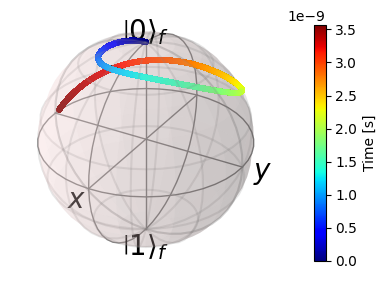

In [ ]:
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
b=Bloch()
b.axes = ax1
b.fig = fig
## normalize colors to times in tlist ##
nrm=mpl.colors.Normalize(0,delt_t)
colors=cm.jet(nrm(tlist))
## add data points from expectation values ##
b.add_points([output_time.expect[0],output_time.expect[1],output_time.expect[2]],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[8]
b.view=[-9,11]
b.zlpos=[1.1,-1.2]
b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
## plot sphere ##
## Add color bar ##
sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
sm.set_array([])  # You need to set a dummy array for the right scaling
cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
cbar.set_label('Time [s]')
b.render()
plt.show()

In [ ]:
output_time.expect[0][-1]

-0.06312431770531293

In [ ]:
output_time.expect[1][-1]

-0.9979802113696414

In [ ]:
output_time.expect[2][-1]

0.0071286905420892

# $R_z(\alpha = \Delta\omega t)$

In [ ]:
from qutip import basis, hadamard_transform

In [ ]:
# Parametros para fijar frecuencia de larmor
h = 1
# factor giromagnetico:
gir = 1.760e11
# angulo deseado:
alpha = np.pi/2
# Campo homogeneo:
B0 = 10e-3
print(f"B0 = {B0} [T]")
# Para girar univamente en el eje x se necesita hacer que
# wz = wx:
ω_z = gir*B0
ω_x = 0
print(f"ω_x = {ω_x} [rad/s]")
print(f"f_x = {ω_x/(2*np.pi)} [hz]")
# Delta de tiempo para que se mueva el espin a un ciclo:
delt_t = (alpha)/ω_z
print(f"tiempo = {delt_t} [s]")
# Calculo de B1:
B1 = 0
print(f"B1 = {B1} [T]")
# Omega x:
O_x = gir*(B1/2)

B0 = 0.01 [T]
ω_x = 0 [rad/s]
f_x = 0.0 [hz]
tiempo = 8.924979129516458e-10 [s]
B1 = 0 [T]


In [ ]:
# Simulacion en RWA:
ket_0 = basis(2, 0)
state_hadamard = hadamard_transform() * ket_0
H0 = (h/2)*(ω_z-ω_x)*sigmaz()
H1 = (h/2)*O_x*sigmax()
H = [H0,[H1, pulse_x]]
args = {"t_init": 0, "t_final": delt_t}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 10000)
output_rwa = mesolve(H, state_hadamard, tlist, c_ops, e_ops, args)

<ipython-input-18-6c0756c5b7dc>:3: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  state_hadamard = hadamard_transform() * ket_0


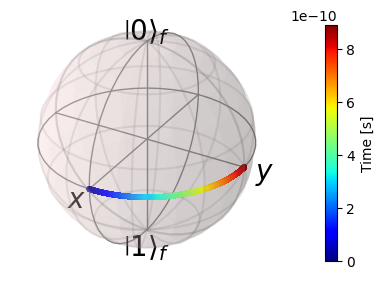

In [ ]:
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
b=Bloch()
b.axes = ax1
b.fig = fig
## normalize colors to times in tlist ##
nrm=mpl.colors.Normalize(0,delt_t)
colors=cm.jet(nrm(tlist))
## add data points from expectation values ##
b.add_points([output_rwa.expect[0],output_rwa.expect[1],output_rwa.expect[2]],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[8]
b.view=[-9,11]
b.zlpos=[1.1,-1.2]
b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
## plot sphere ##
## Add color bar ##
sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
sm.set_array([])  # You need to set a dummy array for the right scaling
cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
cbar.set_label('Time [s]')
b.render()
plt.show()

In [ ]:
output_rwa.expect[0][-1]

-2.3369104040771305e-08

In [ ]:
output_rwa.expect[1][-1]

0.9999999999999994

In [ ]:
output_rwa.expect[2][-1]

0.0

In [ ]:
# Simulacion sin RWA:
ket_0 = basis(2, 0)
state_hadamard = hadamard_transform() * ket_0
H0 = (h/2)*(ω_z)*sigmaz()
H1 = (h)*O_x*sigmax()
H = [H0,[H1, pulse_x_cos]]
args = {"t_init": 0, "t_final": delt_t, "w":ω_x}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 200000)
output_time = mesolve(H, state_hadamard, tlist, c_ops, e_ops, args)

<ipython-input-23-09d7fc97cbcb>:3: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  state_hadamard = hadamard_transform() * ket_0


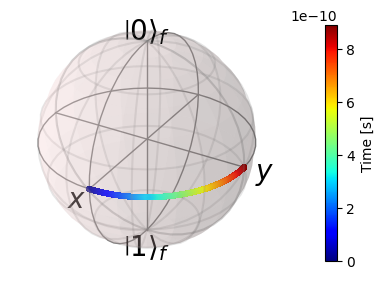

In [ ]:
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
b=Bloch()
b.axes = ax1
b.fig = fig
## normalize colors to times in tlist ##
nrm=mpl.colors.Normalize(0,delt_t)
colors=cm.jet(nrm(tlist))
## add data points from expectation values ##
b.add_points([output_time.expect[0],output_time.expect[1],output_time.expect[2]],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[8]
b.view=[-9,11]
b.zlpos=[1.1,-1.2]
b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
## plot sphere ##
## Add color bar ##
sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
sm.set_array([])  # You need to set a dummy array for the right scaling
cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
cbar.set_label('Time [s]')
b.render()
plt.show()

In [ ]:
output_time.expect[0][-1]

7.788203415515227e-11

In [ ]:
output_time.expect[1][-1]

1.0

In [ ]:
output_time.expect[2][-1]

0.0

#$R_y(\theta)$

In [ ]:
def traducir_a_positivo(angulo):
    while angulo < 0:
        angulo += 2 * np.pi
    return angulo

## Aproximacion con RWA

In [ ]:
# Parametros para fijar frecuencia de larmor
h = 1
# factor giromagnetico:
gir = 1.760e11
# Campo homogeneo:
B0 = 10e-3
print(f"B0 = {B0} [T]")

B0 = 0.01 [T]


In [ ]:
# RZ (-pi/2)

# angulo deseado:
alpha = -np.pi/2
alpha  = traducir_a_positivo(alpha)
# frecuencias:
ω_z = gir*B0
ω_x = 0
print(f"ω_x = {ω_x} [rad/s]")
print(f"f_x = {ω_x/(2*np.pi)} [hz]")
# Delta de tiempo para que se mueva el espin a un ciclo:
delt_t = (alpha)/ω_z
print(f"tiempo = {delt_t} [s]")
# Calculo de B1:
B1 = 0
print(f"B1 = {B1} [T]")
# Omega x:
O_x = gir*(B1/2)

ω_x = 0 [rad/s]
f_x = 0.0 [hz]
tiempo = 2.6774937388549373e-09 [s]
B1 = 0 [T]


In [ ]:
# Simulacion en RWA: RZ (-pi/2)
ket_0 = basis(2, 0)
H0 = (h/2)*(ω_z-ω_x)*sigmaz()
H1 = (h/2)*O_x*sigmax()
H = [H0,[H1, pulse_x]]
args = {"t_init": 0, "t_final": delt_t}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 10000)

output_rwa_1_exp = mesolve(H, ket_0, tlist, c_ops, e_ops, args)
output_rwa_1_states = mesolve(H, ket_0, tlist, c_ops, [], args)
end_state_1 = output_rwa_1_states.states[-1]

In [ ]:
# Rx (theta)

# angulo deseado:
alpha = np.pi/4
# Para girar univamente en el eje x se necesita hacer que
# wz = wx:
ω_z = gir*B0
ω_x = gir*B0
print(f"ω_x = {ω_x} [rad/s]")
print(f"f_x = {ω_x/(2*np.pi)} [hz]")
# Delta de tiempo para que se mueva el espin a un ciclo:
delt_t = (2*np.pi*1)/ω_x
print(f"tiempo = {delt_t} [s]")
# Calculo de B1:
B1 = (alpha*2)/(gir*delt_t)
print(f"B1 = {B1} [T]")
# Omega x:
O_x = gir*(B1/2)

ω_x = 1760000000.0 [rad/s]
f_x = 280112699.8417358 [hz]
tiempo = 3.5699916518065832e-09 [s]
B1 = 0.0025 [T]


In [ ]:
# Simulacion en RWA: Rx (theta)

H0 = (h/2)*(ω_z-ω_x)*sigmaz()
H1 = (h/2)*O_x*sigmax()
H = [H0,[H1, pulse_x]]
args = {"t_init": 0, "t_final": delt_t}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 10000)

output_rwa_2_exp = mesolve(H, end_state_1, tlist, c_ops, e_ops, args)
output_rwa_2_states = mesolve(H, end_state_1, tlist, c_ops, [], args)
end_state_2 = output_rwa_2_states.states[-1]

In [ ]:
# RZ (pi/2)

# angulo deseado:
alpha = np.pi/2
# frecuencias:
ω_z = gir*B0
ω_x = 0
print(f"ω_x = {ω_x} [rad/s]")
print(f"f_x = {ω_x/(2*np.pi)} [hz]")
# Delta de tiempo para que se mueva el espin a un ciclo:
delt_t = (alpha)/ω_z
print(f"tiempo = {delt_t} [s]")
# Calculo de B1:
B1 = 0
print(f"B1 = {B1} [T]")
# Omega x:
O_x = gir*(B1/2)

ω_x = 0 [rad/s]
f_x = 0.0 [hz]
tiempo = 8.924979129516458e-10 [s]
B1 = 0 [T]


In [ ]:
# Simulacion en RWA: RZ (pi/2)

H0 = (h/2)*(ω_z-ω_x)*sigmaz()
H1 = (h/2)*O_x*sigmax()
H = [H0,[H1, pulse_x]]
args = {"t_init": 0, "t_final": delt_t}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 10000)

output_rwa_3_exp = mesolve(H, end_state_2, tlist, c_ops, e_ops, args)
output_rwa_3_states = mesolve(H, end_state_2, tlist, c_ops, [], args)
end_state_3 = output_rwa_3_states.states[-1]

In [ ]:
delt_t

8.924979129516458e-10

In [ ]:
output_rwa_1_exp.expect[0]

array([0., 0., 0., ..., 0., 0., 0.])

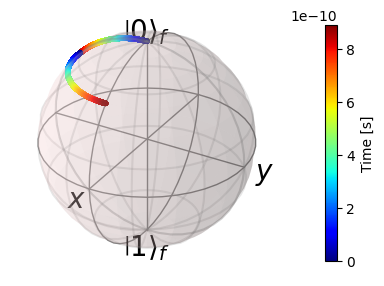

In [ ]:
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
b=Bloch()
b.axes = ax1
b.fig = fig
## normalize colors to times in tlist ##
nrm = mpl.colors.Normalize(0,delt_t)
colors = cm.jet(nrm(tlist))
## add data points from expectation values ##
b.add_points([output_rwa_1_exp.expect[0],output_rwa_1_exp.expect[1],output_rwa_1_exp.expect[2]],'m')
b.add_points([output_rwa_2_exp.expect[0],output_rwa_2_exp.expect[1],output_rwa_2_exp.expect[2]],'m')
b.add_points([output_rwa_3_exp.expect[0],output_rwa_3_exp.expect[1],output_rwa_3_exp.expect[2]],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[8]
b.view=[-9,11]
b.zlpos=[1.1,-1.2]
b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
sm.set_array([])  # You need to set a dummy array for the right scaling
cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
cbar.set_label('Time [s]')
b.render()
plt.show()

In [ ]:
output_rwa_2_exp.expect[0][-1]

4.884981308350689e-15

In [ ]:
output_rwa_2_exp.expect[1][-1]

-0.7071067187761171

In [ ]:
output_rwa_2_exp.expect[2][-1]

0.7071068435969724

## Aproximación sin RWA

In [ ]:
# Parametros para fijar frecuencia de larmor
h = 1
# factor giromagnetico:
gir = 1.760e11
# Campo homogeneo:
B0 = 10e-3
print(f"B0 = {B0} [T]")

# RZ (-pi/2)

# angulo deseado:
alpha = -np.pi/2
alpha  = traducir_a_positivo(alpha)
# frecuencias:
ω_z = gir*B0
ω_x = 0
print(f"ω_x = {ω_x} [rad/s]")
print(f"f_x = {ω_x/(2*np.pi)} [hz]")
# Delta de tiempo para que se mueva el espin a un ciclo:
delt_t = abs((alpha)/ω_z)
print(f"tiempo = {delt_t} [s]")
# Calculo de B1:
B1 = 0
print(f"B1 = {B1} [T]")
# Omega x:
O_x = gir*(B1/2)

# ket inicial
ket_0 = basis(2, 0)


H0 = (h/2)*(ω_z-ω_x)*sigmaz()
H1 = (h/2)*O_x*sigmax()
H = [H0,[H1, pulse_x]]
args = {"t_init": 0, "t_final": delt_t}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 10000)

output_rwa_1_exp = mesolve(H, ket_0, tlist, c_ops, e_ops, args)
output_rwa_1_states = mesolve(H, ket_0, tlist, c_ops, [], args)
end_state_1 = output_rwa_1_states.states[-1]


# Rx (theta)

# angulo deseado:
alpha = np.pi/4
# Para girar univamente en el eje x se necesita hacer que
# wz = wx:
ω_z = gir*B0
ω_x = gir*B0
print(f"ω_x = {ω_x} [rad/s]")
print(f"f_x = {ω_x/(2*np.pi)} [hz]")
# Delta de tiempo para que se mueva el espin a un ciclo:
delt_t = (2*np.pi*1)/ω_x
print(f"tiempo = {delt_t} [s]")
# Calculo de B1:
B1 = (alpha*2)/(gir*delt_t)
print(f"B1 = {B1} [T]")
# Omega x:
O_x = gir*(B1/2)

H0 = (h/2)*(ω_z)*sigmaz()
H1 = (h)*O_x*sigmax()
H = [H0,[H1, pulse_x_cos]]
args = {"t_init": 0, "t_final": delt_t, "w":ω_x}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 10000)

tlist_c = tlist.copy()

output_rwa_2_exp = mesolve(H, end_state_1, tlist, c_ops, e_ops, args)
output_rwa_2_states = mesolve(H, end_state_1, tlist, c_ops, [], args)
end_state_2 = output_rwa_2_states.states[-1]

# RZ (pi/2)

# angulo deseado:
alpha = np.pi/2
# frecuencias:
ω_z = gir*B0
ω_x = 0
print(f"ω_x = {ω_x} [rad/s]")
print(f"f_x = {ω_x/(2*np.pi)} [hz]")
# Delta de tiempo para que se mueva el espin a un ciclo:
delt_t = (alpha)/ω_z
print(f"tiempo = {delt_t} [s]")
# Calculo de B1:
B1 = 0
print(f"B1 = {B1} [T]")
# Omega x:
O_x = gir*(B1/2)

H0 = (h/2)*(ω_z-ω_x)*sigmaz()
H1 = (h/2)*O_x*sigmax()
H = [H0,[H1, pulse_x]]
args = {"t_init": 0, "t_final": delt_t}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 10000)

output_rwa_3_exp = mesolve(H, end_state_2, tlist, c_ops, e_ops, args)
output_rwa_3_states = mesolve(H, end_state_2, tlist, c_ops, [], args)
end_state_3 = output_rwa_3_states.states[-1]

B0 = 0.01 [T]
ω_x = 0 [rad/s]
f_x = 0.0 [hz]
tiempo = 2.6774937388549373e-09 [s]
B1 = 0 [T]
ω_x = 1760000000.0 [rad/s]
f_x = 280112699.8417358 [hz]
tiempo = 3.5699916518065832e-09 [s]
B1 = 0.0025 [T]
ω_x = 0 [rad/s]
f_x = 0.0 [hz]
tiempo = 8.924979129516458e-10 [s]
B1 = 0 [T]


In [ ]:
tlist_c

tensor([0.00000000e+00, 3.57034869e-13, 7.14069737e-13, ...,
        3.56927758e-09, 3.56963462e-09, 3.56999165e-09], requires_grad=True)

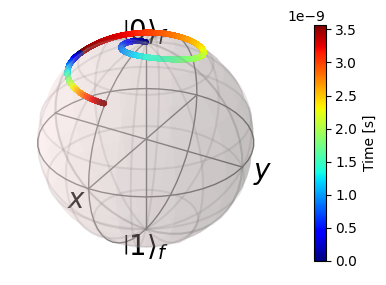

In [ ]:
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
b=Bloch()
b.axes = ax1
b.fig = fig
## normalize colors to times in tlist ##
nrm = mpl.colors.Normalize(0,3.5699916518065832e-09)
colors = cm.jet(nrm(tlist_c))
## add data points from expectation values ##
b.add_points([output_rwa_1_exp.expect[0],output_rwa_1_exp.expect[1],output_rwa_1_exp.expect[2]],'m')
b.add_points([output_rwa_2_exp.expect[0],output_rwa_2_exp.expect[1],output_rwa_2_exp.expect[2]],'m')
b.add_points([output_rwa_3_exp.expect[0],output_rwa_3_exp.expect[1],output_rwa_3_exp.expect[2]],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[8]
b.view=[-9,11]
b.zlpos=[1.1,-1.2]
b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
sm.set_array([])  # You need to set a dummy array for the right scaling
cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
cbar.set_label('Time [s]')
b.render()
plt.show()

In [ ]:
output_rwa_2_exp.expect[0][-1]

-0.008821901881311933

In [ ]:
output_rwa_2_exp.expect[1][-1]

-0.7065303439345343

In [ ]:
output_rwa_2_exp.expect[2][-1]

0.7076277602998241

# CLASE DEFINITIVA


In [ ]:
def traducir_a_positivo(angulo):
    while angulo < 0:
        angulo += 2 * np.pi
    return angulo

In [ ]:
from qutip import *
import matplotlib as mpl
from matplotlib import cm

In [ ]:
class Quantum_Spin_Proces:
    def __init__(self, h = 1, gir = 1.760e11, B0 = 10e-3, nf = 1, N_qubits = 1,J = 1, tf_noise = False,
                 noise_std = 0.01, B1_offset = 0, n_points_pulse_Ri = 100,
                 n_points_pulse_2Qbits = 100, n_swap = 1):
        #self.del_t_Ri = delt_t
        #self.ω_x = (2*np.pi*n_f)/self.del_t_Ri
        #self.g_e = g_e
        #self.u_b = u_b


        self.gir = gir
        self.B0 = B0
        self.Dt = -7

        self.h = h
        self.nf = nf
        self.N_qubits = N_qubits
        self.J = J
        self.tf_noise = tf_noise
        self.noise_std = noise_std
        self.B1_offset = B1_offset
        self.n_points_pulse_Ri = n_points_pulse_Ri
        self.n_points_pulse_2Qbits = n_points_pulse_2Qbits
        self.n_swap = n_swap

    def Rz(self, alpha, ket_0, q_obj = 0, tf_expect = True):
      # Estados iniciales y qubit objetivo:
      self.q_obj = q_obj
      self.ket_0 = ket_0
      # parametros de compuerta:
      self.ω_x = 0
      self.ω_z = self.gir * self.B0
      alpha  = traducir_a_positivo(alpha)
      self.delt_t = (alpha)/self.ω_z
      self.B1 = 0
      self.O_x = self.gir*(self.B1/2)
      # solucion:
      out = self.Hamiltonian_solve(tf_expect)
      return out

    def Rx(self, alpha, ket_0, q_obj = 0, tf_expect = True):
      # Estados iniciales y qubit objetivo:
      self.q_obj = q_obj
      self.ket_0 = ket_0
      # parametros de compuerta:
      self.ω_x = self.gir * self.B0
      self.ω_z = self.gir * self.B0
      self.delt_t = (2*np.pi*self.nf)/self.ω_x
      self.B1 = (alpha * 2)/(self.gir * self.delt_t)
      self.O_x = self.gir*(self.B1/2)
      # solucion:
      out = self.Hamiltonian_solve(tf_expect)
      return out

    def Ry(self, alpha, ket_0, q_obj = 0, tf_expect = True):

      out_1 = self.Rx(np.pi/2, ket_0, q_obj=q_obj, tf_expect = False)
      end_state_1 = out_1.states[-1]
      out_2 = self.Rz(alpha, end_state_1,q_obj=q_obj, tf_expect = False)
      end_state_2 = out_2.states[-1]
      out_3 = self.Rx(-np.pi/2, end_state_2,q_obj=q_obj, tf_expect = False)
      end_state_3 = out_3.states[-1]
      if tf_expect == True:
        out_1_exp = self.Rx(np.pi/2, ket_0, q_obj=q_obj, tf_expect = True)
        out_2_exp = self.Rz(alpha, end_state_1,q_obj=q_obj, tf_expect = True)
        out_3_exp = self.Rx(-np.pi/2, end_state_2,q_obj=q_obj, tf_expect = True)
        out = [out_1_exp, out_2_exp, out_3_exp]
      else:
        out = out_3
      return out

    def H(self, ket_0, alpha = np.pi/2, q_obj = 0, tf_expect = True):
      out_1 = self.Rz(np.pi/2, ket_0, q_obj=q_obj, tf_expect = False)
      end_state_1 = out_1.states[-1]
      out_2 = self.Rx(alpha, end_state_1,q_obj=q_obj, tf_expect = False)
      end_state_2 = out_2.states[-1]
      out_3 = self.Rz(np.pi/2, end_state_2,q_obj=q_obj, tf_expect = False)
      end_state_3 = out_3.states[-1]
      if tf_expect == True:
        out_1_exp = self.Rz(np.pi/2, ket_0, q_obj=q_obj, tf_expect = True)
        out_2_exp = self.Rx(alpha, end_state_1,q_obj=q_obj, tf_expect = True)
        out_3_exp = self.Rz(np.pi/2, end_state_2,q_obj=q_obj, tf_expect = True)
        out = [out_1_exp, out_2_exp, out_3_exp]
      else:
        out = out_3
      return out

    def SWAP(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = True):
      self.ket_0 = ket_0
      self.Dt = np.pi/(self.J*self.n_swap)
      self.measure = measure_op
      self.qobj = Qobj(self.measure, dims=[[2,2],[2,2]])
      self.out = self.Hamiltonian_solve_excharge(tf_expectt)
      return self.out

    def sqrt_SWAP(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = True):
      self.ket_0 = ket_0
      self.Dt = (np.pi/(2*self.J*self.n_swap))
      self.measure = measure_op
      self.qobj = Qobj(self.measure, dims=[[2,2],[2,2]])
      self.out = self.Hamiltonian_solve_excharge(tf_expectt)
      return self.out

    def CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False):
      q_control , q_target = q_obj
      state_1 = self.Ry(np.pi/2, ket_0, q_obj = q_target, tf_expect = False).states[-1]
      state_2 = self.sqrt_SWAP(state_1, [], tf_expectt = False).states[-1]
      state_3 = self.Rz(np.pi, state_2, q_obj = q_control, tf_expect = False).states[-1]
      state_4 = self.sqrt_SWAP(state_3, [], tf_expectt = False).states[-1]
      state_5 = self.Rz(-np.pi/2, state_4, q_obj = q_control, tf_expect = False).states[-1]
      state_6 = self.Rz(-np.pi/2, state_5, q_obj = q_target, tf_expect = False).states[-1]
      state_7 = self.Ry(-np.pi/2, state_6, q_obj = q_target, tf_expect = False).states[-1]
      return state_7

    def CZ(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False):
      q_control , q_target = q_obj
      state_2 = self.sqrt_SWAP(ket_0, [], tf_expectt = False).states[-1]
      state_3 = self.Rz(-np.pi, state_2, q_obj = q_control, tf_expect = False).states[-1]
      state_4 = self.sqrt_SWAP(state_3, [], tf_expectt = False).states[-1]
      state_5 = self.Rz(np.pi/2, state_4, q_obj = q_control, tf_expect = False).states[-1]
      state_6 = self.Rz(-np.pi/2, state_5, q_obj = q_target, tf_expect = False).states[-1]
      return state_6

    def Hamiltonian_solve(self, tf_expect = True):
      # Hamiltonian H0
      h0_constant = - (self.h/2) * (self.ω_x) # + (self.h/2) * (self.ω_z)
      h1_constant =   (self.h/2) * (self.ω_z)
      h2_constant =   (self.h/2) * (self.O_x)
      if self.N_qubits > 1:
        apply_qbit_z = []
        apply_qbit_x = []
        for i in range(self.N_qubits):
          if i == self.q_obj:
            apply_qbit_z.append(sigmaz())
            apply_qbit_x.append(sigmax())
          else:
            apply_qbit_z.append(qeye(2))
            apply_qbit_x.append(qeye(2))
      else:
        apply_qbit_z = [sigmaz()]
        apply_qbit_x = [sigmax()]
      H0 = h0_constant * tensor(*apply_qbit_z)
      H1 = h1_constant * tensor(*apply_qbit_z)
      H2 = h2_constant * tensor(*apply_qbit_x)
      self.args = { "t_init": 0, "t_final": self.delt_t, "std_noise": self.noise_std }
      self.tlist  = np.linspace(0, self.delt_t, self.n_points_pulse_Ri)
      # Hamiltonian
      if self.tf_noise == False:
        H = [H0, [H1, pulse_z], [H2, pulse_x]]
      else:
        print("Entre con ruido!")
        noise_x = pulse_x_with_noise(self.tlist, self.args)
        S_x = Cubic_Spline(self.tlist[0], self.tlist[-1], noise_x)
        noise_z = pulse_z_with_noise(self.tlist, self.args)
        S_z = Cubic_Spline(self.tlist[0], self.tlist[-1], noise_z)
        H = [H0, [H1, S_z], [H2, S_x]]

      if tf_expect:
        if self.N_qubits > 1:
          apply_qbit_e_ops = []
          for i in range(self.N_qubits):
            if i == self.q_obj:
              apply_qbit_e_ops.append(sigmaz())
            else:
              apply_qbit_e_ops.append(qeye(2))
          e_ops = [tensor(*apply_qbit_e_ops)]
        else:
          e_ops = [sigmax(), sigmay(), sigmaz()]
      else:
        e_ops = []
      c_ops = []
      self.output_rwa = mesolve(H, self.ket_0, self.tlist, c_ops, e_ops, self.args)
      return self.output_rwa

    def Hamiltonian_solve_excharge(self, tf_expect = True):
      delt_t = self.Dt
      H = ((self.J * self.h**2)/4)*(tensor(sigmax(), sigmax()) + tensor(sigmay(), sigmay()) + tensor(sigmaz(), sigmaz()))
      #H = (self.J/4)*(tensor(sigmax(), sigmax()) + tensor(sigmay(), sigmay()))
      qobj = Qobj(self.measure, dims=[[2,2],[2,2]])
      h_t = [H, pulse_x]
      self.args = { "t_init": 0, "t_final": delt_t, "std_noise": self.noise_std }
      #self.args = {"t_init":0, "t_final": delt_t, "noise": True}
      c_ops = []
      if tf_expect:
        e_ops = [qobj]
      else:
        e_ops = []
      self.tlist  = np.linspace(0, delt_t, self.n_points_pulse_2Qbits)
      self.output = mesolve(h_t, self.ket_0, self.tlist, c_ops, e_ops, self.args)
      return self.output

    def plot_expect(self, out, ry_tf = False):
      ## create Bloch sphere instance ##
      if ry_tf == False:
        fig = plt.figure(constrained_layout=True)
        ax1 = fig.add_subplot(1, 2, 1, projection='3d')
        b=Bloch()
        b.axes = ax1
        b.fig = fig
        ## normalize colors to times in tlist ##
        nrm = mpl.colors.Normalize(0, self.delt_t)
        colors = cm.jet(nrm(self.tlist))
        ## add data points from expectation values ##
        b.add_points([out.expect[0],out.expect[1],out.expect[2]],'m')
        ## customize sphere properties ##
        b.point_color=list(colors)
        b.point_marker=['o']
        b.point_size=[8]
        b.view=[-9,11]
        b.zlpos=[1.1,-1.2]
        b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
        ## plot sphere ##
        b.render()
        ## Add color bar ##
        sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
        sm.set_array([])  # You need to set a dummy array for the right scaling
        cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
        cbar.set_label('Time [s]')
        plt.show()
      else:
        fig = plt.figure(constrained_layout=True)
        ax1 = fig.add_subplot(1, 2, 1, projection='3d')
        b=Bloch()
        b.axes = ax1
        b.fig = fig
        ## normalize colors to times in tlist ##
        nrm = mpl.colors.Normalize(0, self.delt_t)
        colors = cm.jet(nrm(self.tlist))
        ## add data points from expectation values ##
        for i in range(len(out)):
          b.add_points([out[i].expect[0], out[i].expect[1], out[i].expect[2]],'m')
        ## customize sphere properties ##
        b.point_color=list(colors)
        b.point_marker=['o']
        b.point_size=[8]
        b.view=[-9,11]
        b.zlpos=[1.1,-1.2]
        b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
        ## plot sphere ##
        b.render()
        ## Add color bar ##
        sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
        sm.set_array([])  # You need to set a dummy array for the right scaling
        cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
        cbar.set_label('Time [s]')
        plt.show()

    def plot_excharges(self, out, index, ry_tf = False):

      labels_axis = ["X","Y","Z"]
      # Grafica del valor esperado:
      if ry_tf == False:
        plt.figure(figsize=(6, 2))
        # Subplot para el valor esperado
        plt.subplot(1, 1, 1)  # 2 filas, 1 columna, primer subplot
        plt.plot(self.tlist, out.expect[index])
        plt.title(f'Valor Esperado \n Eje {labels_axis[index]}')
        plt.xlabel('Tiempo')
        plt.ylabel('Valor Esperado')
        plt.grid(True)
      else:
        time = list(self.tlist) + list(self.tlist) + list(self.tlist)
        Ntime = len(time)
        tt = np.linspace(0,3e-9,Ntime)
        y = list(out[0].expect[index]) + list(out[1].expect[index]) + list(out[2].expect[index])
        plt.figure(figsize=(6, 2))
        # Subplot para el valor esperado
        plt.subplot(1, 1, 1)  # 2 filas, 1 columna, primer subplot
        plt.plot(tt, y)
        plt.title(f'Valor Esperado \ Eje {labels_axis[index]}')
        plt.xlabel('Tiempo')
        plt.ylabel('Valor Esperado')
        plt.grid(True)
      plt.show()
      print("\n")
      # Grafica del pulso:
      if self.tf_noise == False:
        if self.Dt == -7:
          # Subplot para el pulso
          plt.figure(figsize=(4, 3))
          plt.subplot(2, 1, 1)  # 2 filas, 1 columna, segundo subplot
          plt.plot(self.tlist, self.B0 * pulse_z(self.tlist, self.args))
          plt.title('Pulso B0')
          plt.xlabel('Tiempo')
          plt.ylabel('Amplitud')
          plt.grid(True)
          # Subplot para el pulso
          plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segundo subplot
          plt.plot(self.tlist, self.B1 * pulse_x(self.tlist, self.args))
          plt.title('Pulso B1')
          plt.xlabel('Tiempo')
          plt.ylabel('Amplitud')
          plt.grid(True)
        else:
          plt.figure(figsize=(4, 3))
          plt.subplot(2, 1, 1)  # 2 filas, 1 columna, segundo subplot
          plt.plot(self.tlist, self.J * pulse_z(self.tlist, self.args))
          plt.title('Pulso B0')
          plt.xlabel('Tiempo')
          plt.ylabel('Amplitud')
          plt.grid(True)

      else:
        if self.Dt == -7:
          plt.figure(figsize=(4, 3))
          plt.subplot(2, 1, 1)  # 2 filas, 1 columna, segundo subplot
          plt.plot(self.tlist, self.B0 * pulse_z_with_noise(self.tlist, self.args))
          plt.title('Pulso B0')
          plt.xlabel('Tiempo')
          plt.ylabel('Amplitud')
          plt.grid(True)
          # Subplot para el pulso
          plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segundo subplot
          plt.plot(self.tlist, self.B1 * pulse_x_with_noise(self.tlist, self.args))
          plt.title('Pulso B1')
          plt.xlabel('Tiempo')
          plt.ylabel('Amplitud')
          plt.grid(True)
        else:
          plt.figure(figsize=(4, 3))
          plt.subplot(2, 1, 1)  # 2 filas, 1 columna, segundo subplot
          plt.plot(self.tlist, self.J * pulse_z(self.tlist, self.args))
          plt.title('Pulso B0')
          plt.xlabel('Tiempo')
          plt.ylabel('Amplitud')
          plt.grid(True)
      # Ajustar el espacio entre los subgráficos para evitar solapamiento
      plt.tight_layout()
      # Mostrar el gráfico
      plt.show()

Porque cuando le pongo true al noise se desplaza si offset? REVISAR -> Posible explicación: Numero de Puntos.

### Clase $R_z$

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

<ipython-input-52-6018060fba88>:3: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  state_hadamard = hadamard_transform() * ket_0


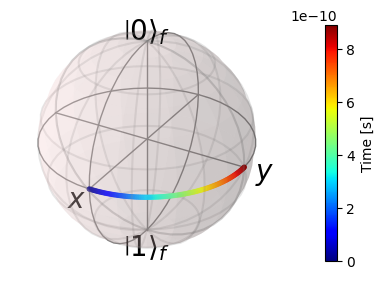

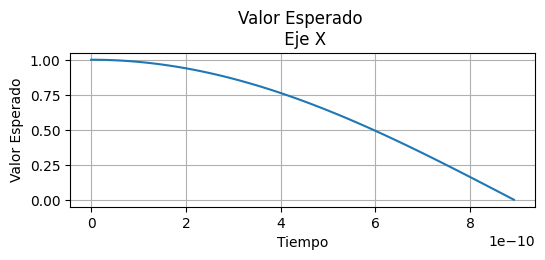

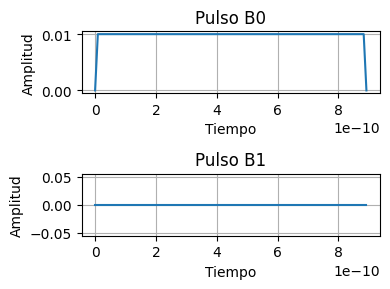

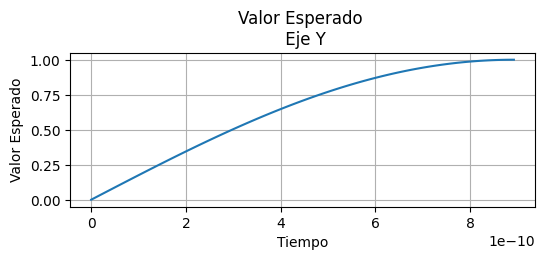

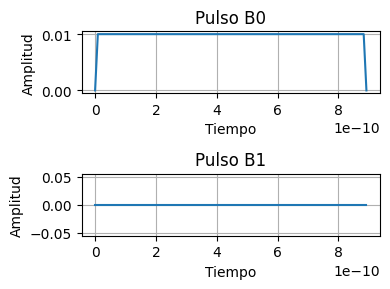

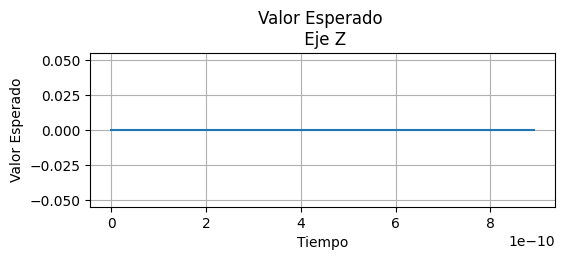

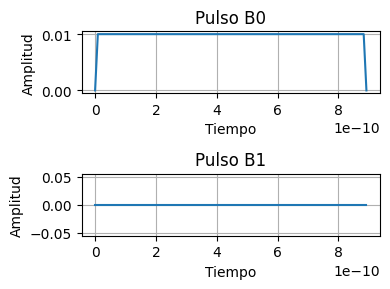

In [ ]:
model = Quantum_Spin_Proces(tf_noise = False, noise_std = 0.00, B1_offset = 0)
ket_0 = basis(2, 0)
state_hadamard = hadamard_transform() * ket_0
out = model.Rz(np.pi/2, state_hadamard)
model.plot_expect(out)
model.plot_excharges(out, 0, False)
model.plot_excharges(out, 1, False)
model.plot_excharges(out, 2, False)

<ipython-input-53-f64ee815f7b0>:3: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  state_hadamard = hadamard_transform() * ket_0


Entre con ruido!


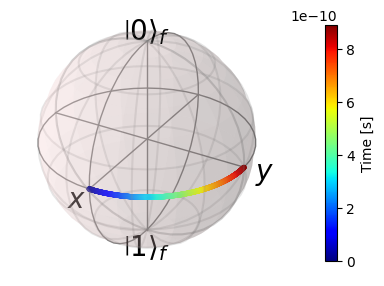

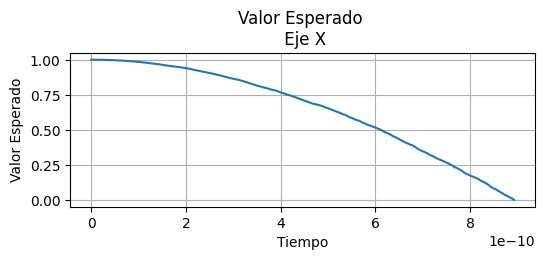

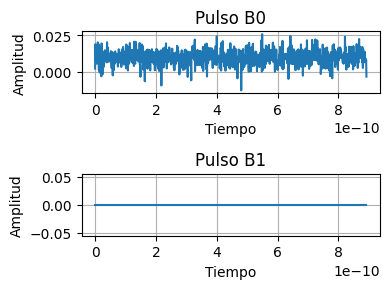

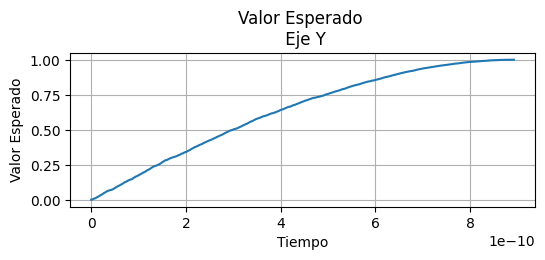

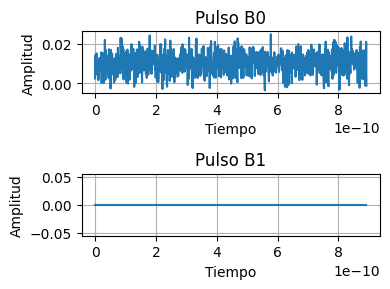

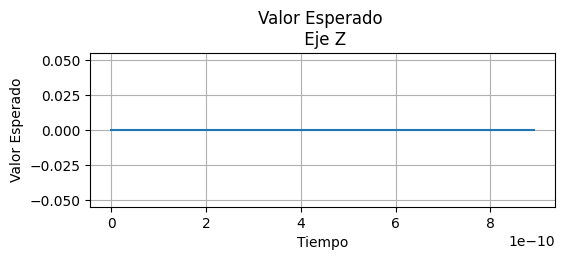

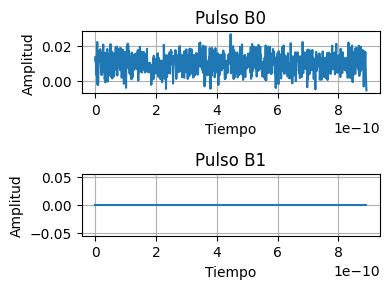

In [ ]:
model = Quantum_Spin_Proces(tf_noise = True, noise_std = 0.5, B1_offset = 12, n_points_pulse_Ri = 1000)
ket_0 = basis(2, 0)
state_hadamard = hadamard_transform() * ket_0
out = model.Rz(np.pi/2, state_hadamard)
model.plot_expect(out)
model.plot_excharges(out, 0, False)
model.plot_excharges(out, 1, False)
model.plot_excharges(out, 2, False)

### Clase $Rx$

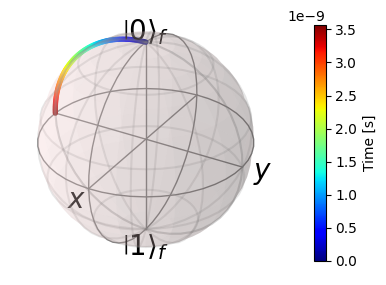

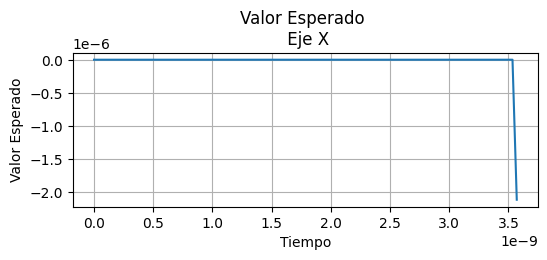

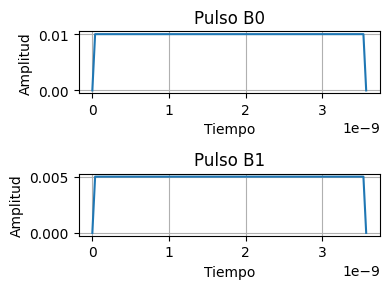

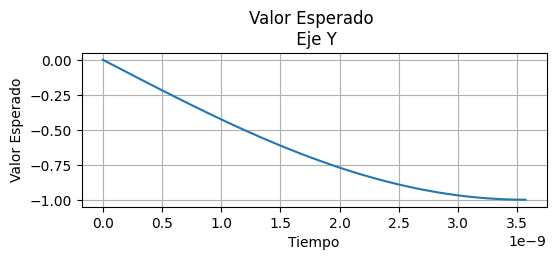

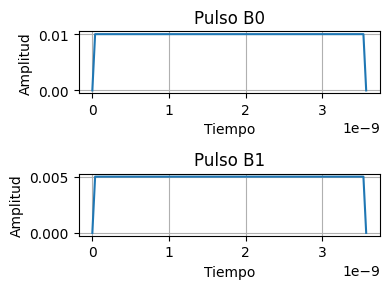

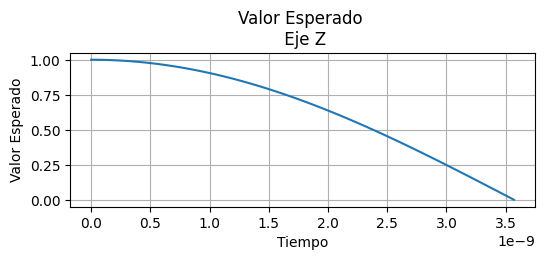

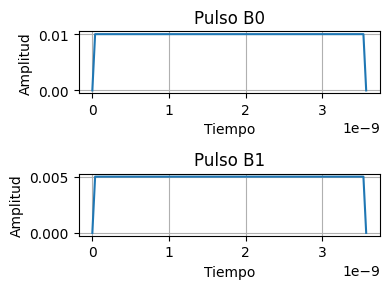

In [ ]:
model = Quantum_Spin_Proces(tf_noise = False, noise_std = 5)
ket_0 = basis(2, 0)
out = model.Rx(np.pi/2, ket_0)
model.plot_expect(out)
model.plot_excharges(out, 0, False)
model.plot_excharges(out, 1, False)
model.plot_excharges(out, 2, False)

Entre con ruido!


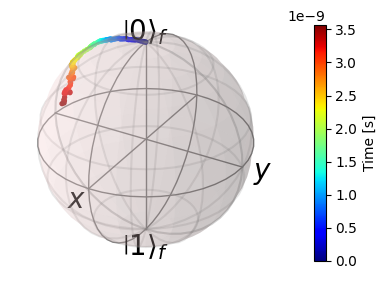

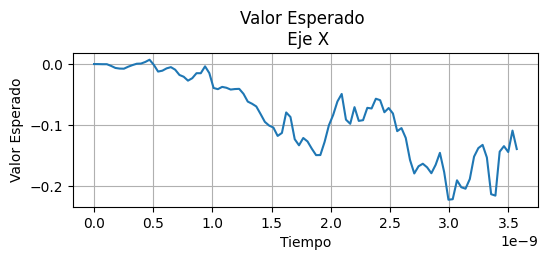

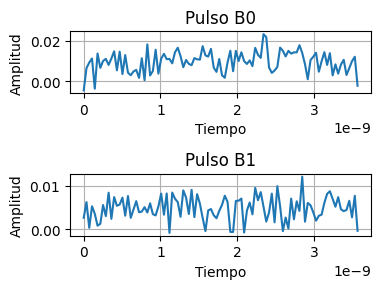

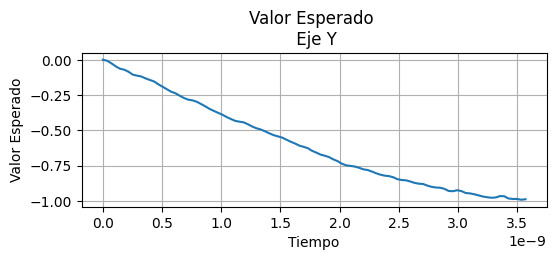

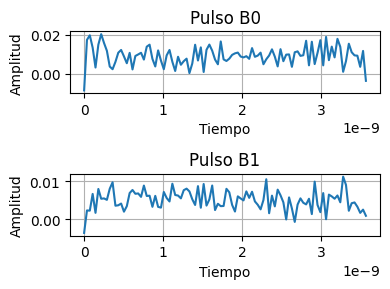

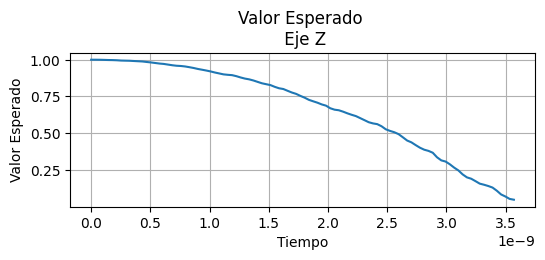

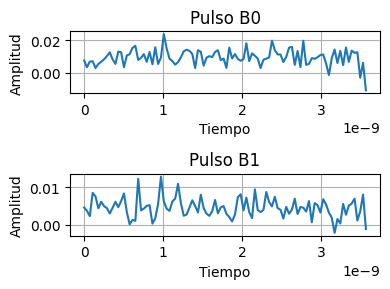

In [ ]:
model = Quantum_Spin_Proces(tf_noise = True, noise_std = 0.5)
ket_0 = basis(2, 0)
out = model.Rx(np.pi/2, ket_0)
model.plot_expect(out)
model.plot_excharges(out, 0, False)
model.plot_excharges(out, 1, False)
model.plot_excharges(out, 2, False)

### Clase $R_y$

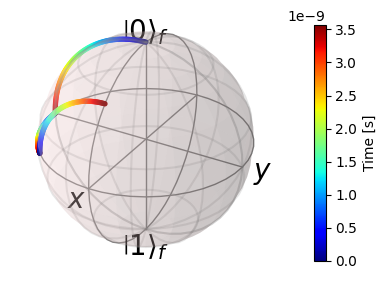

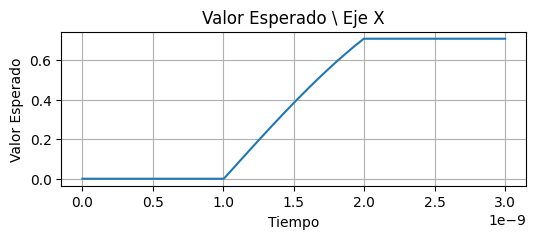

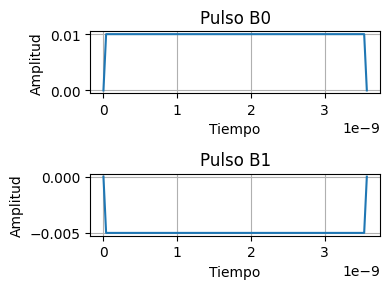

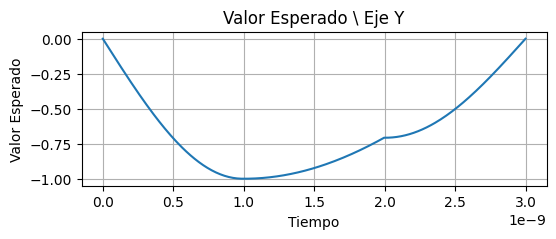

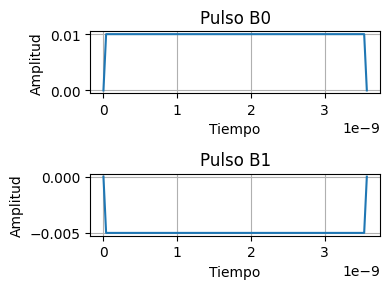

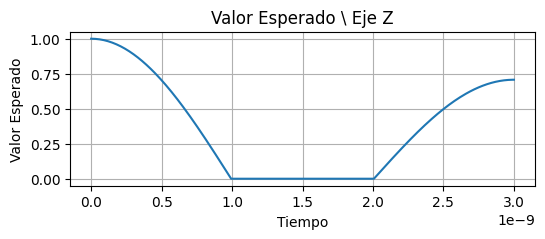

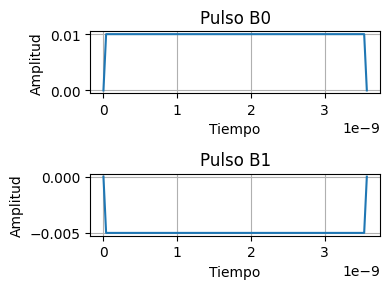

In [ ]:
model = Quantum_Spin_Proces(tf_noise = False, noise_std = 0.01)
ket_0 = basis(2, 0)
out = model.Ry(np.pi/4, ket_0)
model.plot_expect(out, True)
model.plot_excharges(out, 0, True)
model.plot_excharges(out, 1, True)
model.plot_excharges(out, 2, True)

Entre con ruido!
Entre con ruido!
Entre con ruido!
Entre con ruido!
Entre con ruido!
Entre con ruido!


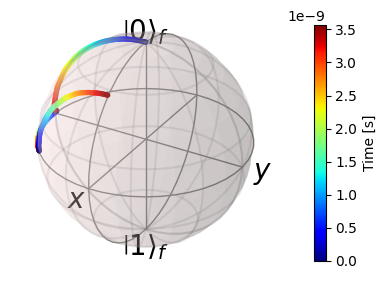

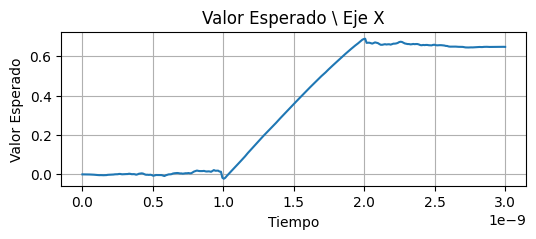

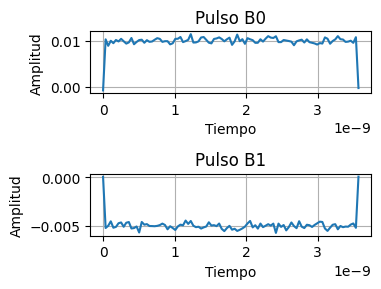

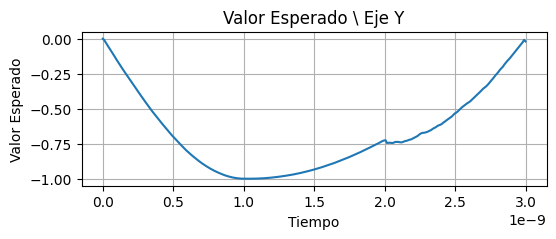

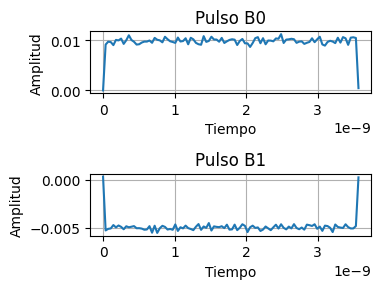

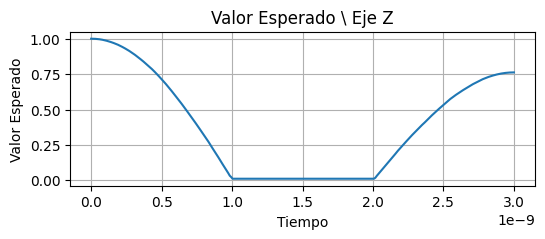

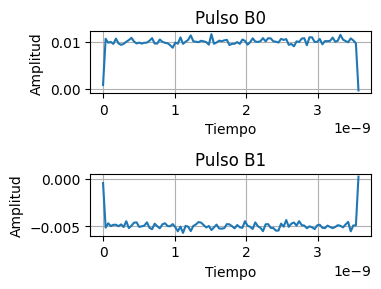

In [ ]:
model = Quantum_Spin_Proces(tf_noise = True, noise_std = 0.05)
ket_0 = basis(2, 0)
out = model.Ry(np.pi/4, ket_0)
model.plot_expect(out, True)
model.plot_excharges(out, 0, True)
model.plot_excharges(out, 1, True)
model.plot_excharges(out, 2, True)

# Pruebas de dos qubits

In [ ]:
model = Quantum_Spin_Proces()
ket_0 = basis(2, 0)
out = model.Ry(np.pi/4, ket_0, tf_expect = False)
out.states[-1]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.92388159-1.49262778e-06j]
 [0.38267847-8.05850792e-07j]]

In [ ]:
model = Quantum_Spin_Proces(N_qubits = 2)
ket_0 = tensor(basis(2, 0),basis(2, 0))
out = model.Ry(np.pi/2, ket_0, q_obj = 1,  tf_expect = False)
out.states[-1]

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.70711034-3.15568013e-06j]
 [0.70710323-4.58351280e-07j]
 [0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j]]

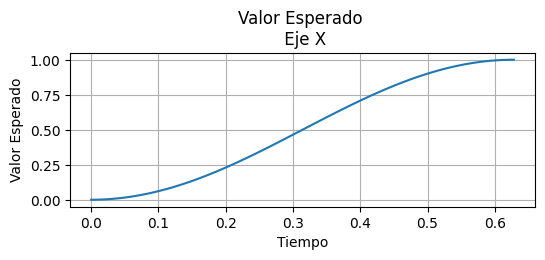

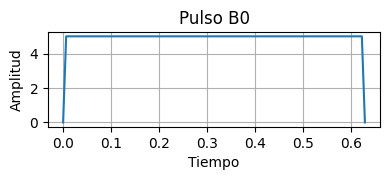

In [ ]:
import numpy as np
model = Quantum_Spin_Proces(J = 5)
up = basis(2,0)
down = basis(2,1)
ket_0 = tensor(up, down)
out = model.SWAP(ket_0, np.array([[0,0,0,0],[0,0,0,0],[0,0,1,0],[0,0,0,0]]))
model.plot_excharges(out,0)

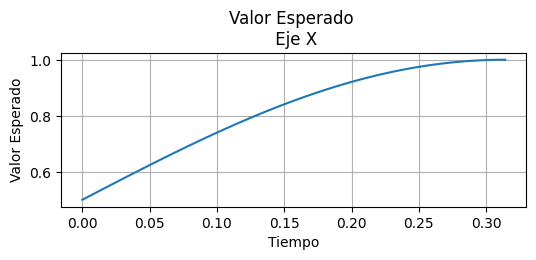

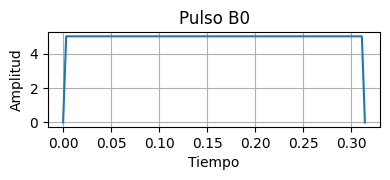

In [ ]:
model = Quantum_Spin_Proces(J = 5)
up = basis(2,0)
down = basis(2,1)
ket_0 = tensor(up, down)

my_measure = np.array([[0.0000 + 0.0000*1j,   0.0000 + 0.0000*1j,   0.0000 + 0.0000*1j,   0.0000 + 0.0000*1j],
 [0.0000 + 0.0000*1j,   0.5000 + 0.0000*1j ,  0.0000 + 0.5000*1j,   0.0000 + 0.0000*1j],
  [0.0000 + 0.0000*1j,   0.0000 - 0.5000*1j,   0.5000 + 0.0000*1j,   0.0000 + 0.0000*1j],
   [0.0000 + 0.0000*1j,   0.0000 + 0.0000*1j,   0.0000 + 0.0000*1j,   0.0000 + 0.0000*1j]])

out = model.sqrt_SWAP(ket_0, my_measure)
model.plot_excharges(out,0)

In [ ]:
model = Quantum_Spin_Proces(N_qubits = 2)

qbit_0 = basis(2,1)
qbit_1 = basis(2,0)
ket_0 = tensor(qbit_0, qbit_1)

print(ket_0.full())
print("\n")
# (self, alpha, ket_0, q_obj = 0, tf_expect = True)

# out = model.Ry(np.pi/4, ket_0, tf_expect = False)

state_1 = model.Ry(np.pi/2, ket_0, q_obj=1, tf_expect = False).states[-1]

print(state_1)
print("\n")

# sqrt_SWAP(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = True)

state_2 = model.sqrt_SWAP(state_1, [], tf_expectt = False).states[-1]

print(state_2)
print("\n")
state_3 = model.Rz(np.pi, state_2, q_obj = 0, tf_expect = False).states[-1]

print(state_3)
print("\n")
state_4 = model.sqrt_SWAP(state_3, [], tf_expectt = False).states[-1]

print(state_4)
print("\n")
state_5 = model.Rz(-np.pi/2, state_4, q_obj = 0, tf_expect = False).states[-1]

print(state_5)
print("\n")
state_6 = model.Rz(-np.pi/2, state_5, q_obj = 1, tf_expect = False).states[-1]

print(state_6)
print("\n")
state_7 = model.Ry(-np.pi/2, state_6, q_obj = 1, tf_expect = False).states[-1]

print(np.round(state_7.full(),2))
print("\n")

[[0.+0.j]
 [0.+0.j]
 [1.+0.j]
 [0.+0.j]]


Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j]
 [0.70711034-3.15568013e-06j]
 [0.70710323-4.58351280e-07j]]


Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.        +0.j        ]
 [0.19134133-0.4619367j ]
 [0.46194598+0.19133334j]
 [0.65328178-0.27059815j]]


Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.        +0.j        ]
 [-0.46193355-0.19134895j]
 [-0.19132572+0.46194914j]
 [ 0.27060892+0.65327732j]]


Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.00000000e+00+0.00000000e+00j]
 [ 8.54523294e-06-7.94034108e-06j]
 [-4.99990117e-01+5.00003969e-01j]
 [ 5.00011004e-01+4.99994910e-01j]]


Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.00000000e+00+0.00000000e+00j]
 [-1.16570498e-05-4.28034213e-07j]
 [-

In [ ]:
state_7.full()
dm =  state_7 * state_7.dag()
np.round(dm.full(),2)

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.-0.j, 0.-0.j, 0.+0.j, 0.-0.j],
       [0.-0.j, 0.-0.j, 0.+0.j, 1.+0.j]])

# CNOT de clase

In [ ]:
# [0,0]
model = Quantum_Spin_Proces(N_qubits = 2, n_swap = 1, J = 1)
up = basis(2,0)
down = basis(2,0)
ket_0 = tensor(up, down)
# CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
state = model.CNOT(ket_0, [])
state = model.CZ(state, [])
print(np.round(state.full(),3))
dm =  state * state.dag()
np.abs(np.round(dm.full(),2))

[[-1.-0.j]
 [ 0.+0.j]
 [-0.+0.j]
 [-0.+0.j]]


array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
# [0,1]
model = Quantum_Spin_Proces(N_qubits = 2)
up = basis(2,0)
down = basis(2,1)
ket_0 = tensor(up, down)
# CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
state = model.CNOT(ket_0, [])
state = model.CZ(state, [])
print(np.round(state.full(),3))
dm =  state * state.dag()
np.abs(np.round(dm.full(),2))

[[-0.+0.j]
 [-1.+0.j]
 [ 0.-0.j]
 [-0.+0.j]]


array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
# [1,0]
model = Quantum_Spin_Proces(N_qubits = 2)
up = basis(2,1)
down = basis(2,0)
ket_0 = tensor(up, down)
# CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
state = model.CNOT(ket_0, [])
print(np.round(state.full(),3))
dm =  state * state.dag()
np.round(dm.full(),2)

[[-0.   +0.j   ]
 [-0.   +0.j   ]
 [-0.   +0.j   ]
 [-0.707+0.707j]]


array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.-0.j, 0.-0.j, 0.+0.j, 0.-0.j],
       [0.-0.j, 0.-0.j, 0.+0.j, 1.+0.j]])

In [ ]:
# [1,1]
model = Quantum_Spin_Proces(N_qubits = 2)
up = basis(2,1)
down = basis(2,1)
ket_0 = tensor(up, down)
# CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
state = model.CNOT(ket_0, [])
print(np.round(state.full(),3))
dm =  state * state.dag()
np.round(dm.full(),2)

[[ 0.   -0.j   ]
 [ 0.   -0.j   ]
 [-0.707+0.707j]
 [ 0.   +0.j   ]]


array([[ 0.+0.j,  0.+0.j, -0.-0.j,  0.-0.j],
       [ 0.+0.j,  0.+0.j, -0.-0.j,  0.-0.j],
       [-0.+0.j, -0.+0.j,  1.+0.j, -0.+0.j],
       [ 0.+0.j,  0.+0.j, -0.-0.j,  0.+0.j]])

# CZ clase

In [ ]:
# [0,0]
model = Quantum_Spin_Proces(N_qubits = 2)
up = basis(2,0)
down = basis(2,0)
ket_0 = tensor(up, down)
# CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
state = model.CZ(ket_0, [])
print(np.round(state.full(),3))
dm =  state * state.dag()
np.abs(np.round(dm.full(),2))

[[0.707+0.707j]
 [0.   +0.j   ]
 [0.   +0.j   ]
 [0.   +0.j   ]]


array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
# [0,1]
model = Quantum_Spin_Proces(N_qubits = 2)
up = basis(2,0)
down = basis(2,1)
ket_0 = tensor(up, down)
# CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
state = model.CZ(ket_0, [])
print(np.round(state.full(),3))
dm =  state * state.dag()
np.abs(np.round(dm.full(),2))

[[ 0.   +0.j   ]
 [ 0.707+0.707j]
 [-0.   -0.j   ]
 [ 0.   +0.j   ]]


array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
# [1,0]
model = Quantum_Spin_Proces(N_qubits = 2)
up = basis(2,1)
down = basis(2,0)
ket_0 = tensor(up, down)
# CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
state = model.CZ(ket_0, [])
print(np.round(state.full(),3))
dm =  state * state.dag()
np.abs(np.round(dm.full(),2))

[[0.   +0.j   ]
 [0.   +0.j   ]
 [0.707+0.707j]
 [0.   +0.j   ]]


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.]])

In [ ]:
# [1,1]
model = Quantum_Spin_Proces(N_qubits = 2)
up = basis(2,1)
down = basis(2,1)
ket_0 = tensor(up, down)
# CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
state = model.CZ(ket_0, [])
print(np.round(state.full(),3))
dm =  state * state.dag()
np.round(dm.full(),2)

[[ 0.   +0.j   ]
 [ 0.   +0.j   ]
 [ 0.   +0.j   ]
 [-0.707-0.707j]]


array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

# H gate

In [ ]:
model = Quantum_Spin_Proces()
ket_0 = basis(2, 0)
out = model.H(ket_0, tf_expect = False)
state = out.states[-1]
print(np.round(state.full(),3))
dm =  state * state.dag()
np.round(dm.full(),2)

[[ 0.-0.707j]
 [-0.-0.707j]]


array([[0.5+0.j, 0.5+0.j],
       [0.5-0.j, 0.5+0.j]])

In [ ]:
model = Quantum_Spin_Proces()
ket_0 = basis(2, 1)
out = model.H(ket_0, tf_expect = False)
state = out.states[-1]
print(np.round(state.full(),3))
dm =  state * state.dag()
np.round(dm.full(),2)

[[0.-0.707j]
 [0.+0.707j]]


array([[ 0.5+0.j, -0.5-0.j],
       [-0.5+0.j,  0.5+0.j]])

# Pruebas de entrelazamiento

In [ ]:
model = Quantum_Spin_Proces(N_qubits = 2)

up = basis(2,0)
down = basis(2,0)
ket_0 = tensor(up, down)

out = model.H(ket_0, q_obj = 0, tf_expect = False)
state_H = out.states[-1]

print(np.round(state_H.full(),3))
dm =  state_H * state_H.dag()
np.abs(np.round(dm.full(),2))

out = model.CNOT(state_H, [], q_obj = [0,1])
state_2 = out

print(np.round(state_2.full(),3))
dm =  state_2 * state_2.dag()
np.abs(np.round(dm.full(),4))


concurrence(state_2)

[[ 0.-0.707j]
 [ 0.+0.j   ]
 [-0.-0.707j]
 [ 0.+0.j   ]]
[[0.5+0.5j]
 [0. -0.j ]
 [0. +0.j ]
 [0.5+0.5j]]


0.9999999950197902

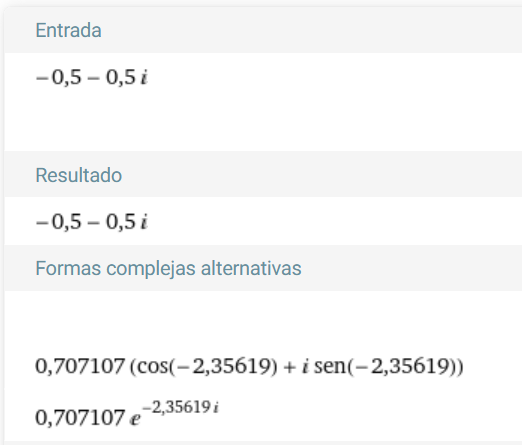

In [ ]:
model = Quantum_Spin_Proces(N_qubits = 2)

up = basis(2,0)
down = basis(2,1)
ket_0 = tensor(up, down)

out = model.H(ket_0, q_obj = 0, tf_expect = False)
state_H = out.states[-1]

print(np.round(state_H.full(),3))
dm =  state_H * state_H.dag()
np.abs(np.round(dm.full(),2))

out = model.CNOT(state_H, [], q_obj = [0,1])
state_2 = out

print(np.round(state_2.full(),3))
dm =  state_2 * state_2.dag()
np.abs(np.round(dm.full(),4))


concurrence(state_2)

[[ 0.+0.j   ]
 [ 0.-0.707j]
 [ 0.+0.j   ]
 [-0.-0.707j]]
[[0. -0.j ]
 [0.5+0.5j]
 [0.5+0.5j]
 [0. -0.j ]]


0.9999999966361008

In [ ]:
model = Quantum_Spin_Proces(N_qubits = 2)

up = basis(2,1)
down = basis(2,0)
ket_0 = tensor(up, down)

out = model.H(ket_0, q_obj = 0, tf_expect = False)
state_H = out.states[-1]

print(np.round(state_H.full(),3))
dm =  state_H * state_H.dag()
np.abs(np.round(dm.full(),2))

out = model.CNOT(state_H, [], q_obj = [0,1])
state_2 = out

print(np.round(state_2.full(),3))
dm =  state_2 * state_2.dag()

print(state_2.dag())

print(np.round(dm.full(),4))


concurrence(state_2)

[[0.-0.707j]
 [0.+0.j   ]
 [0.+0.707j]
 [0.+0.j   ]]
[[ 0.5+0.5j]
 [-0. -0.j ]
 [-0. -0.j ]
 [-0.5-0.5j]]
Quantum object: dims = [[1, 1], [2, 2]], shape = (1, 4), type = bra
Qobj data =
[[ 4.99950938e-01-5.00039382e-01j -2.29403321e-06+1.09147681e-04j
  -8.89792785e-05+3.05482279e-07j -5.00062263e-01+4.99947386e-01j]]
[[ 5.e-01+0.j     -1.e-04+0.0001j -0.e+00-0.j     -5.e-01-0.0001j]
 [-1.e-04-0.0001j  0.e+00+0.j      0.e+00+0.j      1.e-04+0.0001j]
 [-0.e+00+0.j      0.e+00-0.j      0.e+00+0.j      0.e+00-0.j    ]
 [-5.e-01+0.0001j  1.e-04-0.0001j  0.e+00+0.j      5.e-01+0.j    ]]


0.999999978930816

# SWAP gate

In [ ]:
def pulse_x(t, args):
    t_init = args["t_init"]
    t_final = args["t_final"]
    return np.heaviside((t-t_init), 0) * np.heaviside(-(t - t_final), 0.0)

In [ ]:
J = 5
delt_t = (np.pi/(J))
H = (J/4)*(tensor(sigmax(), sigmax()) + tensor(sigmay(), sigmay()))
up = basis(2,0)
down = basis(2,1)
ket_0 = tensor(up, down)

In [ ]:
measure = np.array([[0,0,0,0],[0,0,0,0],[0,0,1,0],[0,0,0,0]])
qobj = Qobj(measure, dims=[[2,2],[2,2]])
h_t = [H, pulse_x]
args = {"t_init":0, "t_final": delt_t}
c_ops = []
e_ops = [qobj]
tlist  = np.linspace(0, 10.0, 15000)
output = mesolve(h_t, ket_0, tlist, c_ops, e_ops, args)

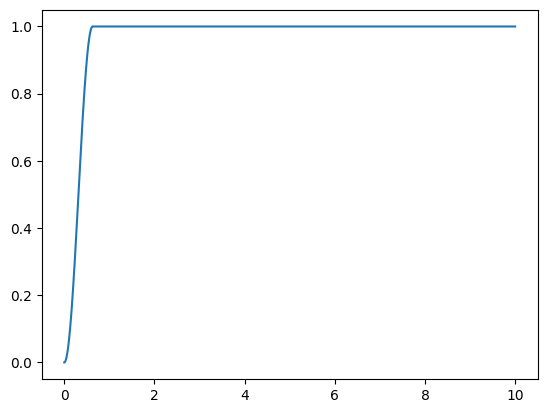

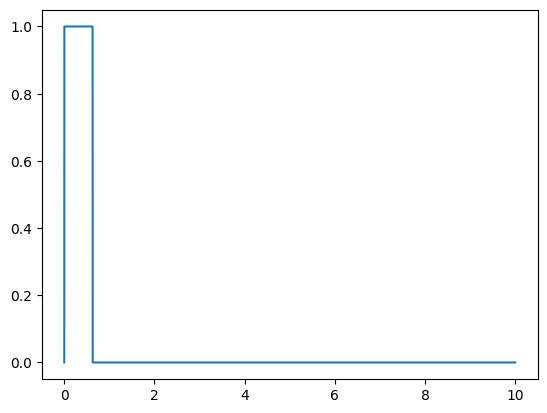

In [ ]:
from pylab import *
plot(tlist, output.expect[0])
show()
plot(tlist, pulse_x(tlist, args))
show()

# $\sqrt{SWAP}$

In [ ]:
measure = np.array([[0.0000 + 0.0000*1j,   0.0000 + 0.0000*1j,   0.0000 + 0.0000*1j,   0.0000 + 0.0000*1j],
 [0.0000 + 0.0000*1j,   0.5000 + 0.0000*1j ,  0.0000 + 0.5000*1j,   0.0000 + 0.0000*1j],
  [0.0000 + 0.0000*1j,   0.0000 - 0.5000*1j,   0.5000 + 0.0000*1j,   0.0000 + 0.0000*1j],
   [0.0000 + 0.0000*1j,   0.0000 + 0.0000*1j,   0.0000 + 0.0000*1j,   0.0000 + 0.0000*1j]])
print(measure.shape)
qobj = Qobj(measure, dims=[[2,2],[2,2]])

(4, 4)


In [ ]:
def U_sw_sqrt(J0, state):
  J = J0
  delt_t = (1/2)*(np.pi/(J))
  H = (J/4)*(tensor(sigmax(), sigmax()) + tensor(sigmay(), sigmay()) +  tensor(sigmaz(), sigmaz()))
  h_t = [H, pulse_x]
  args = {"t_init":0, "t_final": delt_t}
  c_ops = []
  #e_ops = [qobj]
  tlist  = np.linspace(0, delt_t, 15000)
  output = mesolve(h_t, state, tlist, c_ops, [], args)
  return output

In [ ]:
J = 5
delt_t = (1/2)*(np.pi/(J))
H = (J/4)*(tensor(sigmax(), sigmax()) + tensor(sigmay(), sigmay()))
up = basis(2,0)
down = basis(2,1)
ket_0 = tensor(up, down)

In [ ]:
h_t = [H, pulse_x]
args = {"t_init":0, "t_final": delt_t}
c_ops = []
e_ops = [qobj]
tlist  = np.linspace(0, 10.0, 15000)
output = mesolve(h_t, ket_0, tlist, c_ops, e_ops, args)

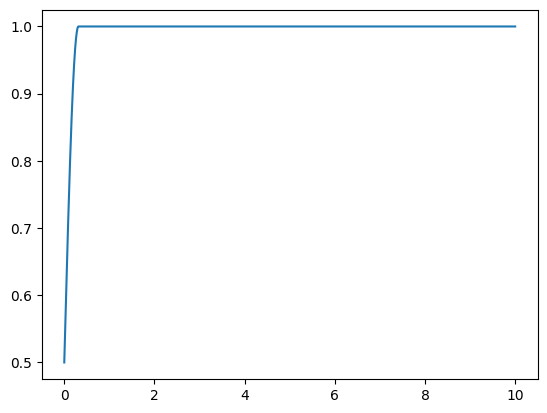

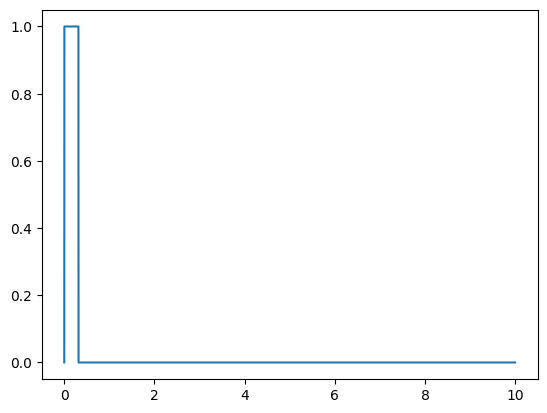

In [ ]:
from pylab import *
plot(tlist, output.expect[0])
show()
plot(tlist, pulse_x(tlist, args))
show()

# $CNOT$

In [ ]:
def R_z_cnot_1(alpha, state_0, D_t=1e-9):
  delt_t = D_t
  ω_x = (2*np.pi*4)/delt_t
  # Parametros para fijar frecuencia de larmor
  h = 1
  g_e = 1
  u_b = 1
  B1 = 0
  B0 = (alpha/delt_t + ω_x)/((h)/(g_e*u_b))
  ω_z = (g_e * u_b * B0)/h
  # Omega_x
  O_x = (g_e * u_b * B1)/(h*2)
  H0 = (h/2) * (ω_z - ω_x) * tensor(sigmaz(), qeye(2))
  H1 = (h/2) * O_x * tensor(sigmax(), qeye(2))
  H = [H0, [H1, pulse_x]]
  args = {"t_init": 0, "t_final": delt_t}
  c_ops = []
  e_ops = [tensor(sigmaz(),sigmaz())]
  tlist  = np.linspace(0, delt_t, 1000)
  output_rwa = mesolve(H, state_0, tlist, c_ops, [], args)
  return output_rwa

In [ ]:
def R_z_cnot_2(alpha, state_0, D_t=1e-9):
  delt_t = D_t
  ω_x = (2*np.pi*4)/delt_t
  # Parametros para fijar frecuencia de larmor
  h = 1
  g_e = 1
  u_b = 1
  B1 = 0
  B0 = (alpha/delt_t + ω_x)/((h)/(g_e*u_b))
  ω_z = (g_e * u_b * B0)/h
  # Omega_x
  O_x = (g_e * u_b * B1)/(h*2)
  H0 = (h/2) * (ω_z - ω_x) * tensor(qeye(2),sigmaz())
  H1 = (h/2) * O_x * tensor(qeye(2),sigmax())
  H = [H0, [H1, pulse_x]]
  args = {"t_init": 0, "t_final": delt_t}
  c_ops = []
  e_ops = [tensor(sigmaz(),sigmaz())]
  tlist  = np.linspace(0, delt_t, 1000)
  output_rwa = mesolve(H, state_0, tlist, c_ops, [], args)
  return output_rwa

## 0,0

In [ ]:

up = basis(2,0)
down = basis(2,0)
ket_0 = tensor(up, down)
print(ket_0)


out_5 = U_sw_sqrt(10, ket_0)
out_4 = R_z_cnot_1(np.pi, out_5.states[-1], D_t=1e-9)
out_3 = U_sw_sqrt(10, out_4.states[-1])
out_2 = R_z_cnot_2(-np.pi/2, out_3.states[-1], D_t=1e-9)
out_1 = R_z_cnot_1(np.pi/2, out_2.states[-1], D_t=1e-9)





# Extract data from the q_object
data_array = out_1.states[-1].full()

# Convert the data array to a NumPy array
numpy_array = np.array(data_array)
np.round(numpy_array,2)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]


array([[-0.71-0.71j],
       [ 0.  +0.j  ],
       [ 0.  +0.j  ],
       [ 0.  +0.j  ]])

In [ ]:
up = basis(2,0)
down = basis(2,1)
ket_0 = tensor(up, down)
print(ket_0)


out_5 = U_sw_sqrt(10, ket_0)
out_4 = R_z_cnot_1(np.pi, out_5.states[-1], D_t=1e-9)
out_3 = U_sw_sqrt(10, out_4.states[-1])
out_2 = R_z_cnot_2((3*np.pi)/2, out_3.states[-1], D_t=1e-9)
out_1 = R_z_cnot_1(np.pi/2, out_2.states[-1], D_t=1e-9)





# Extract data from the q_object
data_array = out_1.states[-1].full()

# Convert the data array to a NumPy array
numpy_array = np.array(data_array)
np.round(numpy_array,2)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]


array([[0.  +0.j  ],
       [0.71+0.71j],
       [0.  +0.j  ],
       [0.  +0.j  ]])

In [ ]:
up = basis(2,1)
down = basis(2,0)
ket_0 = tensor(up, down)
print(ket_0)


out_5 = U_sw_sqrt(10, ket_0)
out_4 = R_z_cnot_1(np.pi, out_5.states[-1], D_t=1e-9)
out_3 = U_sw_sqrt(10, out_4.states[-1])
out_2 = R_z_cnot_2((-np.pi)/2, out_3.states[-1], D_t=1e-9)
out_1 = R_z_cnot_1(np.pi/2, out_2.states[-1], D_t=1e-9)





# Extract data from the q_object
data_array = out_1.states[-1].full()

# Convert the data array to a NumPy array
numpy_array = np.array(data_array)
np.round(numpy_array,2)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]


array([[ 0.  +0.j  ],
       [-0.  -0.j  ],
       [-0.71-0.71j],
       [ 0.  +0.j  ]])

In [ ]:
up = basis(2,1)
down = basis(2,1)
ket_0 = tensor(up, down)
print(ket_0)


out_5 = U_sw_sqrt(10, ket_0)
out_4 = R_z_cnot_1(np.pi, out_5.states[-1], D_t=1e-9)
out_3 = U_sw_sqrt(10, out_4.states[-1])
out_2 = R_z_cnot_2((-np.pi)/2, out_3.states[-1], D_t=1e-9)
out_1 = R_z_cnot_1(np.pi/2, out_2.states[-1], D_t=1e-9)





# Extract data from the q_object
data_array = out_1.states[-1].full()

# Convert the data array to a NumPy array
numpy_array = np.array(data_array)
np.round(numpy_array,2)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]]


array([[0.  +0.j  ],
       [0.  +0.j  ],
       [0.  +0.j  ],
       [0.71+0.71j]])

### Intento fallido

In [ ]:
# frecuencia de control:
delt_t = 1e-9
n = 5
ω_x = (2*np.pi*n)/delt_t
# Parametros para fijar frecuencia de larmor
h = 1
g_e = 1
u_b = 1
# condicion para anular movimiento en eje z:

alpha_1 = np.pi/2
B0_1 = (alpha_1/delt_t + ω_x)*(h/(g_e*u_b))
ω_z_1 = (g_e * u_b * B0_1)/h

# qubiero un alpha = pi/2, en t = 1u[s]
alpha_2 = np.pi/2
B1_1 = (alpha_2/delt_t)*((2*h)/(g_e*u_b))

# Omega_x
O_x_1 = (g_e * u_b * B1_1)/(h*2)

In [ ]:
# qubiero un alpha = pi/2, en t = 1u[s]
alpha_3 = -np.pi/2
B1_2 = 0

B0_2 = (alpha_3/delt_t + ω_x)/((h)/(g_e*u_b))
ω_z_2 = (g_e * u_b * B0_2)/h

# Omega_x
O_x_2 = (g_e * u_b * B1_2)/(h*2)

In [ ]:
# Simulacion en RWA:
up = basis(2, 0)
H0 = (h/2) * (ω_z_1 - ω_x) * sigmaz()
H1 = (h/2) * O_x_1 * sigmax()
H = [H0, [H1, pulse_x]]
args = {"t_init": 0, "t_final": delt_t}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 10000)
output_rwa_1 = mesolve(H, up, tlist, c_ops, e_ops, args)
output_rwa_1_states = mesolve(H, up, tlist, c_ops, [], args)

In [ ]:
end_state = output_rwa_1_states.states[-1]

In [ ]:
H0 = (h/2) * (ω_z_2 - ω_x) * sigmaz()
H1 = (h/2) * O_x_2 * sigmax()
H = [H0, [H1, pulse_x]]
args = {"t_init": 0, "t_final": delt_t}
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
tlist  = np.linspace(0, delt_t, 10000)
output_rwa_2 = mesolve(H, end_state , tlist, c_ops, e_ops, args)

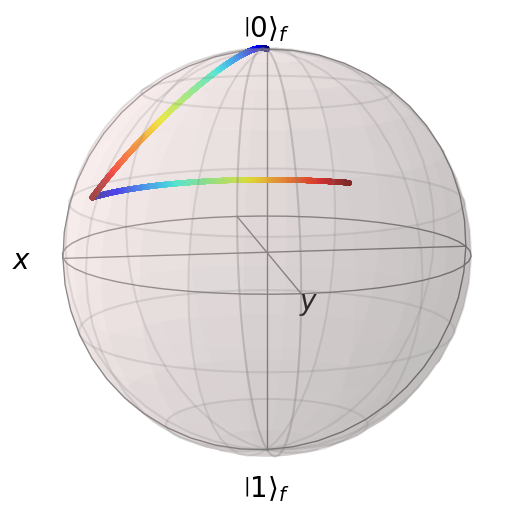

In [ ]:
import matplotlib as mpl
from matplotlib import cm
## create Bloch sphere instance ##
b=Bloch()
## normalize colors to times in tlist ##
nrm = mpl.colors.Normalize(0,delt_t)
colors = cm.jet(nrm(tlist))
## add data points from expectation values ##
b.add_points([output_rwa_1.expect[0],output_rwa_1.expect[1],output_rwa_1.expect[2]],'m')
b.add_points([output_rwa_2.expect[0],output_rwa_2.expect[1],output_rwa_2.expect[2]],'m')
## customize sphere properties ##
b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[8]
b.view=[-9,11]
b.zlpos=[1.1,-1.2]
b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
## plot sphere ##
b.show()

In [ ]:
output_time.expect[0][-1]

7.788203415515227e-11

In [ ]:
output_time.expect[1][-1]

1.0